In [1]:
from sklearn import svm
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [2]:
import pandas as pd
train = pd.read_csv('../data/diabetes_train.csv') #this is our dataset, please change the path for your case
test = pd.read_csv('../data/diabetes_test.csv')
train.columns[:8] #wanted to show which attributs we have

Index(['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'], dtype='object')

In [3]:
clf = clf.fit(train.iloc[:,0:8], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,0:8]) #doing prediction on unknown test set
y_pred

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative'], dtype=object)

In [4]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp 

(5, 2, 1, 2)

In [5]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp

y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])
scores[:,1]
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
roc_auc = auc(fpr,tpr)

fpr

tpr

thresholds

array([1.        , 0.33333333, 0.        ])

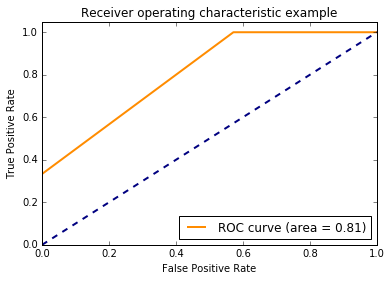

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()